Analysis 4:  
Is the life expectancy affected by type of energy consumption (renewable vs fossil fuels) in each continent?

In [1]:
%matplotlib widget
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# check the df
data_df.head()

In [ ]:
# Reduce df to only columns needed for this analysis
reduced_df = data_df[["Year", "Location", "energy_per_capita", "fossil_energy_per_capita", "renewables_energy_per_capita", "LEx", "LE15", "LE65", "LE80"]]
reduced_df["Location"].value_counts()

# Description of the energy columns:
# - fossil_energy_per_capita: Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
# - renewables_energy_per_capita: Per capita primary energy consumption from renewables, measured in kilowatt-hours
# - energy_per_capita: Primary energy consumption per capita, measured in kilowatt-hours

In [4]:
# Only keep the continents and export to a csv
conts_df = reduced_df.loc[(reduced_df['Location'] == "Africa") |
                     (reduced_df['Location'] == "North America") |
                     (reduced_df['Location'] == "South America") |
                     (reduced_df['Location'] == "Europe") |
                     (reduced_df['Location'] == "Oceania") |
                     (reduced_df['Location'] == "Asia"), :]
conts_df.to_csv("energyLEclean_NA_continents.csv", index=False)

In [7]:
# load the continents csv file as the new data_df (No need to rerun the previous cells except dependencies)
# Make a reference to the csv file path
csv_path_2 = Path("energyLEclean_NA_continents.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path_2)

# check the df
data_df.head()

,Year,Location,energy_per_capita,fossil_energy_per_capita,renewables_energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,2100.505,127.918,43.4401,45.7137,11.2665,4.9844
1,1966,Africa,2275.487,2136.364,139.123,43.4330,45.6340,11.2447,4.9787
2,1967,Africa,2241.349,2099.772,141.577,43.6456,45.5410,11.2492,4.9786
3,1968,Africa,2307.324,2145.930,161.394,44.1023,45.8270,11.3158,4.9931
4,1969,Africa,2310.408,2126.871,183.537,44.3156,45.8841,11.3276,4.9919


In [9]:
# Start analysis

# set variables
years = np.arange(1965, 2023, 1)
fossil_fuel = data_df.loc[(data_df['Location'] == "Africa"), 'fossil_energy_per_capita']
renewable = data_df.loc[(data_df['Location'] == "Africa"), 'renewables_energy_per_capita']
LE_birth = data_df.loc[(data_df['Location'] == "Africa"), 'LEx']


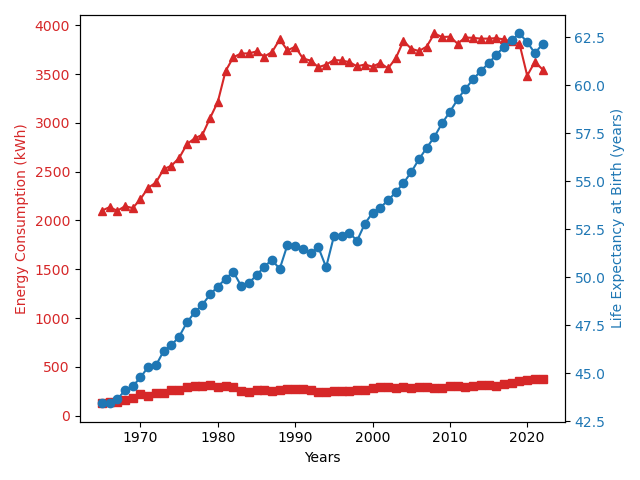

In [14]:

# create line graph
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Energy Consumption (kWh)', color=color)
ax1.plot(years, fossil_fuel, color=color, marker='^', label='Fossil Fuel')
ax1.plot(years, renewable, color=color, marker='s', label='Renewable Energy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Life Expectancy at Birth (years)', color=color)
ax2.plot(years, LE_birth, color=color, marker='o', label='Life Expectancy at Birth')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
plt.title('Africa')
fig.legend()
